In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max.columns", None)
df = pd.read_csv('./data/data.csv')
df = df.dropna()

In [3]:
df.head(10)

,NumberOfIntegers,DataStructure,put(),replace(),containsKey(),containsValue(),get(),remove()
1,100000.0,HashMap,16.32,0.31,0.13,620.35,0.26,0.18
2,100000.0,HashMap_Initialized,5.07,0.29,0.10,749.16,0.23,0.13
3,100000.0,LinkedHashMap,11.61,0.30,0.10,234.36,0.29,0.19
4,100000.0,LinkedHashMap_Initialized,10.98,0.31,0.09,232.99,0.27,0.11
5,100000.0,TreeMap,46.77,0.66,0.45,1342.56,0.58,0.59
7,110000.0,HashMap,9.97,0.27,0.10,727.30,0.25,0.11
8,110000.0,HashMap_Initialized,7.15,0.35,0.10,1074.21,0.29,0.12
9,110000.0,LinkedHashMap,10.92,0.31,0.10,368.72,0.31,0.12
10,110000.0,LinkedHashMap_Initialized,11.51,0.38,0.12,340.60,0.31,0.17
11,110000.0,TreeMap,79.82,1.21,0.67,3186.49,0.99,1.00


### Grouping the values by NumberOfIntegers

In [4]:
g = df.groupby('NumberOfIntegers')
# g.apply(lambda x: x).head(10)
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)).head(10)

NumberOfIntegers              DataStructure  put()  \
NumberOfIntegers                                                         
100000.0         0          100000.0        HashMap_Initialized   5.07   
                 1          100000.0                    TreeMap  46.77   
                 2          100000.0                    HashMap  16.32   
                 3          100000.0              LinkedHashMap  11.61   
                 4          100000.0  LinkedHashMap_Initialized  10.98   
110000.0         0          110000.0        HashMap_Initialized   7.15   
                 1          110000.0  LinkedHashMap_Initialized  11.51   
                 2          110000.0              LinkedHashMap  10.92   
                 3          110000.0                    HashMap   9.97   
                 4          110000.0                    TreeMap  79.82   

                    replace()  containsKey()  containsValue()  get()  remove()  
NumberOfIntegers                                                                
100000.0         0       0.29           0.10           749.16   0.23      0.13  
                 1       0.66           0.45          1342.56   0.58      0.59  
                 2       0.31           0.13           620.35   0.26      0.18  
                 3       0.30           0.10           234.36   0.29      0.19  
                 4       0.31           0.09           232.99   0.27      0.11  
110000.0         0       0.35           0.10          1074.21   0.29      0.12  
                 1       0.38           0.12           340.60   0.31      0.17  
                 2       0.31           0.10           368.72   0.31      0.12  
                 3       0.27           0.10           727.30   0.25      0.11  
                 4       1.21           0.67          3186.49   0.99      1.00

### Taking the minmum value of the insert() column of each group

In [6]:
df.groupby('NumberOfIntegers')['put()'].min()

NumberOfIntegers
100000.0     5.07
110000.0     7.15
120000.0     7.64
130000.0     6.38
140000.0     5.96
            ...  
750000.0    50.17
760000.0    55.89
770000.0    76.37
780000.0    71.61
790000.0    92.96
Name: put(), Length: 70, dtype: float64

### Viewing the entire rows of above values

We need to take the minimum value of each column separately for each group, and consider it as the best data structure for that number of insert values. For example, below, we have considered the insert() column, and taken the minimum run-time for each group. The data structure that values belongs is the best data structure for that particular group in terms of insert() operation.

In [7]:
df.loc[df.groupby('NumberOfIntegers')['put()'].idxmin()][['DataStructure', 'put()']]

,DataStructure,put()
2,HashMap_Initialized,5.07
8,HashMap_Initialized,7.15
16,LinkedHashMap_Initialized,7.64
22,LinkedHashMap_Initialized,6.38
26,HashMap_Initialized,5.96
...,...,...
392,HashMap_Initialized,50.17
398,HashMap_Initialized,55.89
404,HashMap_Initialized,76.37
409,HashMap,71.61


### Method that returns individual grouped dfs with min value of the relevant column

In [8]:
cols = ['put()', 'replace()', 'containsKey()', 'containsValue()', 'get()', 'remove()']
def get_min_dfs():
    return [df.loc[df.groupby('NumberOfIntegers')[col].idxmin()][['NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [9]:
min_dfs = get_min_dfs()
min_dfs[0:2]

[     NumberOfIntegers              DataStructure  put()
 2            100000.0        HashMap_Initialized   5.07
 8            110000.0        HashMap_Initialized   7.15
 16           120000.0  LinkedHashMap_Initialized   7.64
 22           130000.0  LinkedHashMap_Initialized   6.38
 26           140000.0        HashMap_Initialized   5.96
 ..                ...                        ...    ...
 392          750000.0        HashMap_Initialized  50.17
 398          760000.0        HashMap_Initialized  55.89
 404          770000.0        HashMap_Initialized  76.37
 409          780000.0                    HashMap  71.61
 416          790000.0        HashMap_Initialized  92.96
 
 [70 rows x 3 columns],
      NumberOfIntegers              DataStructure  replace()
 2            100000.0        HashMap_Initialized       0.29
 7            110000.0                    HashMap       0.27
 13           120000.0                    HashMap       0.34
 19           130000.0                    Hash

### Adding a new 'recommended' column

Adding a new recommended column to the original dataset with the recommended data structure. Next, consider mapping all the groups(NumberOfIntegers) to their best data structure(here, we have taken the inser() column).

In [10]:
# converting the columns to arrays
num_of_int_arr = min_dfs[0]['NumberOfIntegers'].to_numpy()
col_arr = min_dfs[0]['DataStructure'].to_numpy()

Now, add a new column to save the recommended or the best data structures from each group, and add that value to other rows of each group as well.

Below, we can see that the data structure that has minimum 'insert()' run-time has been added to the every row of each group in a new column.

### Do this to all the groups

#### Get dfs split into each function(insert(), insertAt(), etc.)

In [11]:
def get_dfs():
    return [df[['NumberOfIntegers', 'DataStructure', col]] for col in cols]

In [12]:
split_dfs = get_dfs()
# split_dfs[0:2]

In [13]:
min_datastructures = [min_df['DataStructure'].to_numpy() for min_df in min_dfs] # list of data structures with the minimum value
mappings = [dict(zip(num_of_int_arr, min_df)) for min_df in min_datastructures] # list of mappings
new_cols = ['ds_put()', 'ds_replace()', 'ds_containsKey()', 'ds_containsValue()', 'ds_get()', 'ds_remove()']

for index, split_df in enumerate(split_dfs):
    split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])

/tmp/ipykernel_402/509006722.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_df[new_cols[index]] = split_df['NumberOfIntegers'].map(mappings[index])


In [14]:
split_dfs[0:1][0].head(20)

,NumberOfIntegers,DataStructure,put(),ds_put()
1,100000.0,HashMap,16.32,HashMap_Initialized
2,100000.0,HashMap_Initialized,5.07,HashMap_Initialized
3,100000.0,LinkedHashMap,11.61,HashMap_Initialized
4,100000.0,LinkedHashMap_Initialized,10.98,HashMap_Initialized
5,100000.0,TreeMap,46.77,HashMap_Initialized
7,110000.0,HashMap,9.97,HashMap_Initialized
8,110000.0,HashMap_Initialized,7.15,HashMap_Initialized
9,110000.0,LinkedHashMap,10.92,HashMap_Initialized
10,110000.0,LinkedHashMap_Initialized,11.51,HashMap_Initialized
11,110000.0,TreeMap,79.82,HashMap_Initialized


## Add a dataframe into a ms word table with docx

In [15]:
import docx

table_df = split_dfs[0:1][0].head(20)

doc = docx.Document()

t = doc.add_table(table_df.shape[0]+1, table_df.shape[1])

for j in range(table_df.shape[-1]):
    t.cell(0,j).text = table_df.columns[j]
    
for i in range(table_df.shape[0]):
    for j in range(table_df.shape[-1]):
        t.cell(i+1,j).text = str(table_df.values[i,j])
        
doc.save('./data/pd_df_map_put_table.docx')

## Classification

### Method to get the trained model info

In [16]:
import sklearn.metrics as metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred, average=None))
    print('Recall:\n',metrics.recall_score(y_test, y_pred, average=None))

### Encode the 'DataStructure' column

In [17]:
# encoding data structures so it can be used as an input parameter
ds_encode_dic = {"HashMap": 0, "HashMap_Initialized": 1, "LinkedHashMap": 2, "LinkedHashMap_Initialized": 3, "TreeMap": 4}

split_dfs = [df.replace({"DataStructure": ds_encode_dic}) for df in split_dfs]
# split_dfs = [df.replace({new_cols[i]: ds_encode_dic}) for i, df in enumerate(split_dfs)]

In [18]:
split_dfs[0:1][0].head(10)

,NumberOfIntegers,DataStructure,put(),ds_put()
1,100000.0,0,16.32,HashMap_Initialized
2,100000.0,1,5.07,HashMap_Initialized
3,100000.0,2,11.61,HashMap_Initialized
4,100000.0,3,10.98,HashMap_Initialized
5,100000.0,4,46.77,HashMap_Initialized
7,110000.0,0,9.97,HashMap_Initialized
8,110000.0,1,7.15,HashMap_Initialized
9,110000.0,2,10.92,HashMap_Initialized
10,110000.0,3,11.51,HashMap_Initialized
11,110000.0,4,79.82,HashMap_Initialized


In [21]:
print(split_dfs[0:1][0].shape)

num_of_classes = len(split_dfs[0:1][0]['ds_put()'].unique())
print(num_of_classes)

(350, 4)
3


### split train input and output data

In [22]:
# split train input and output data
Xs = []
Ys = []

for i, df in enumerate(split_dfs):
    Xs.append(df.drop(axis=0, columns=[new_cols[i]]))
    Ys.append(df[new_cols[i]])

## Xgboost classifier

In [33]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model_dic = {}

for X, Y, col_name in zip(Xs, Ys, new_cols):
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
    
    # Create a classifier
    xgb = XGBClassifier(
                          booster='gbtree', 
                          objective='multi:softprob', 
                          random_state=1, 
                          eval_metric="auc", 
                          num_class=num_of_classes,
                          # n_estimators=2000
                          # use_label_encoder=False
                        )

    # define the datasets to evaluate each iteration
    evalset = [(X_train, y_train), (X_test, y_test)]

    # Fit the classifier with the training data
    xgb.fit(X_train, y_train, eval_metric=['merror','mlogloss'], eval_set=evalset, verbose=False)
    
    model_dic[col_name] = xgb

    print('\n--------------------------' + col_name + '--------------------------')
    print_model_performance(xgb, X_test, y_test)
    print('----------------------------------------------------------------')

/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_put()--------------------------
Accuracy score:
 0.9051724137931034
Confusion matrix:
 [[ 3  4  0]
 [ 3 92  3]
 [ 0  1 10]]
Classification report:
                            precision    recall  f1-score   support

                  HashMap     0.5000    0.4286    0.4615         7
      HashMap_Initialized     0.9485    0.9388    0.9436        98
LinkedHashMap_Initialized     0.7692    0.9091    0.8333        11

                 accuracy                         0.9052       116
                macro avg     0.7392    0.7588    0.7462       116
             weighted avg     0.9044    0.9052    0.9040       116

Precision:
 [0.5        0.94845361 0.76923077]
Recall:
 [0.42857143 0.93877551 0.90909091]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_replace()--------------------------
Accuracy score:
 0.8620689655172413
Confusion matrix:
 [[25  0  0  1]
 [ 2 41  1  2]
 [ 0  0 17  1]
 [ 3  6  0 17]]
Classification report:
                            precision    recall  f1-score   support

                  HashMap     0.8333    0.9615    0.8929        26
      HashMap_Initialized     0.8723    0.8913    0.8817        46
            LinkedHashMap     0.9444    0.9444    0.9444        18
LinkedHashMap_Initialized     0.8095    0.6538    0.7234        26

                 accuracy                         0.8621       116
                macro avg     0.8649    0.8628    0.8606       116
             weighted avg     0.8607    0.8621    0.8585       116

Precision:
 [0.83333333 0.87234043 0.94444444 0.80952381]
Recall:
 [0.96153846 0.89130435 0.94444444 0.65384615]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_containsKey()--------------------------
Accuracy score:
 0.896551724137931
Confusion matrix:
 [[25  1  0  0]
 [ 4 43  0  0]
 [ 0  3 16  1]
 [ 2  0  1 20]]
Classification report:
                            precision    recall  f1-score   support

                  HashMap     0.8065    0.9615    0.8772        26
      HashMap_Initialized     0.9149    0.9149    0.9149        47
            LinkedHashMap     0.9412    0.8000    0.8649        20
LinkedHashMap_Initialized     0.9524    0.8696    0.9091        23

                 accuracy                         0.8966       116
                macro avg     0.9037    0.8865    0.8915       116
             weighted avg     0.9026    0.8966    0.8967       116

Precision:
 [0.80645161 0.91489362 0.94117647 0.95238095]
Recall:
 [0.96153846 0.91489362 0.8        0.86956522]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_containsValue()--------------------------
Accuracy score:
 0.9741379310344828
Confusion matrix:
 [[40  3]
 [ 0 73]]
Classification report:
                            precision    recall  f1-score   support

            LinkedHashMap     1.0000    0.9302    0.9639        43
LinkedHashMap_Initialized     0.9605    1.0000    0.9799        73

                 accuracy                         0.9741       116
                macro avg     0.9803    0.9651    0.9719       116
             weighted avg     0.9752    0.9741    0.9739       116

Precision:
 [1.         0.96052632]
Recall:
 [0.93023256 1.        ]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_get()--------------------------
Accuracy score:
 0.9482758620689655
Confusion matrix:
 [[51  3  0  0]
 [ 1 42  0  0]
 [ 0  1  3  0]
 [ 0  1  0 14]]
Classification report:
                            precision    recall  f1-score   support

                  HashMap     0.9808    0.9444    0.9623        54
      HashMap_Initialized     0.8936    0.9767    0.9333        43
            LinkedHashMap     1.0000    0.7500    0.8571         4
LinkedHashMap_Initialized     1.0000    0.9333    0.9655        15

                 accuracy                         0.9483       116
                macro avg     0.9686    0.9011    0.9296       116
             weighted avg     0.9516    0.9483    0.9483       116

Precision:
 [0.98076923 0.89361702 1.         1.        ]
Recall:
 [0.94444444 0.97674419 0.75       0.93333333]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



--------------------------ds_remove()--------------------------
Accuracy score:
 0.896551724137931
Confusion matrix:
 [[32  4  0  0]
 [ 4 67  0  0]
 [ 0  3  0  0]
 [ 0  1  0  5]]
Classification report:
                            precision    recall  f1-score   support

                  HashMap     0.8889    0.8889    0.8889        36
      HashMap_Initialized     0.8933    0.9437    0.9178        71
            LinkedHashMap     0.0000    0.0000    0.0000         3
LinkedHashMap_Initialized     1.0000    0.8333    0.9091         6

                 accuracy                         0.8966       116
                macro avg     0.6956    0.6665    0.6789       116
             weighted avg     0.8744    0.8966    0.8846       116

Precision:
 [0.88888889 0.89333333 0.         1.        ]
Recall:
 [0.88888889 0.94366197 0.         0.83333333]
----------------------------------------------------------------


/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/janithahn/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Learning curves


--------------------------ds_put()--------------------------


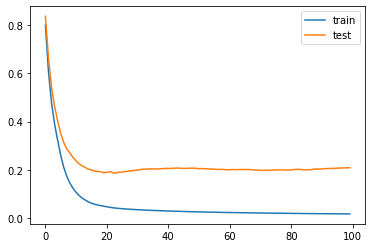


--------------------------ds_replace()--------------------------


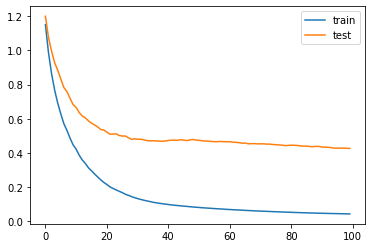


--------------------------ds_containsKey()--------------------------


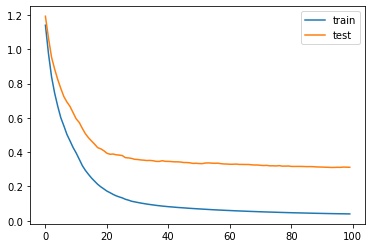


--------------------------ds_containsValue()--------------------------


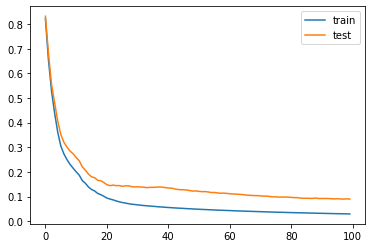


--------------------------ds_get()--------------------------


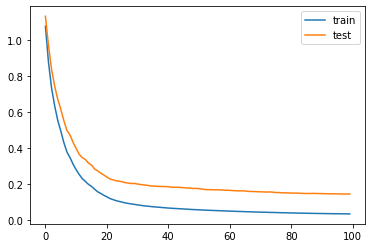


--------------------------ds_remove()--------------------------


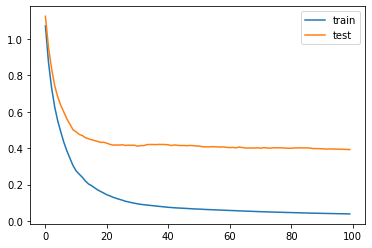

In [34]:
for key, model in model_dic.items():
    print('\n--------------------------' + key + '--------------------------')
    
    # retrieve performance metrics
    results = model.evals_result()

    # plot learning curves
    plt.plot(results['validation_0']['mlogloss'], label='train')
    plt.plot(results['validation_1']['mlogloss'], label='test')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [46]:
# for key, model in model_dic.items():
#     print('\n--------------------------' + key + '--------------------------')
    
#     # retrieve performance metrics
#     results = model.evals_result()

#     # plot learning curves
#     plt.plot(results['validation_0']['merror'], label='train')
#     plt.plot(results['validation_1']['merror'], label='test')
#     # show the legend
#     plt.legend()
#     # show the plot
#     plt.show()

In [47]:
# from sklearn.metrics import roc_auc_score
# from sklearn import preprocessing

# # Use trained model to predict output of test dataset
# val = xgb.predict(X_test)

# lb = preprocessing.LabelBinarizer()
# lb.fit(y_test)

# y_test_lb = lb.transform(y_test)
# val_lb = lb.transform(val)

# roc_auc_score(y_test_lb, val_lb, average='macro')

In [67]:
row = pd.DataFrame(columns=['NumberOfIntegers', 'DataStructure', 'insert()'])
row = row.append({
    'NumberOfIntegers': 100000, 
    'DataStructure': None, 
    'insert()': None
}, ignore_index = True)
print(row)
single_predict = model_dic['ds_insert()'].predict(row)
single_predict

   NumberOfIntegers  DataStructure  insert()
0          100000.0            NaN       NaN


array(['Vector_Initialized'], dtype=object)

## Cross validation

In [ ]:
X_test = Xs[0][1]
y_test = Xs[0][3]

val = model_dic['ds_insert()'].predict(X_test)

output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = val
output.head(20)